In [1]:
import json
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd

In [2]:
# import business.json to raw_business_data
raw_business_data = [json.loads(line) for line in open('yelp_academic_dataset_business.json', 'r')]

# extract vancouver business information
vancouver_business = []
for i in range(len(raw_business_data)):
    city = raw_business_data[i]['city'].lower()
    state = raw_business_data[i]['state'].lower()
    
    if state == 'bc' and ('vancouver' in city):
        vancouver_business.append(raw_business_data[i])

# collect vancouver business id
vb_id = []
for i in range(len(vancouver_business)):
    if vancouver_business[i]['business_id'] not in vb_id:
        vb_id.append(vancouver_business[i]['business_id'])

# import review.json to raw_reviews_data
raw_reviews_data = [json.loads(line) for line in open('yelp_academic_dataset_review.json', 'r')]

# extract reviews on vancouver restaurants.
vancouver_reviews = []
for i in range(len(raw_reviews_data)):
    if raw_reviews_data[i]['business_id'] in vb_id:
        vancouver_reviews.append(raw_reviews_data[i])

In [3]:
# check total number of vancouver_business and vancouver_reviews
print("The total number of vancouver business data is:", len(vancouver_business))
print("The total number of vancouver reviews data is:", len(vancouver_reviews))

The total number of vancouver business data is: 11471
The total number of vancouver reviews data is: 470466


In [ ]:
# create new json files of vancouver business and reviews
with open('vancouver_business_data.json', 'w') as json_outfile:
    json.dump(vancouver_business, json_outfile)
    
with open('vancouver_reviews_data.json', 'w') as json_outfile:
    json.dump(vancouver_reviews, json_outfile)

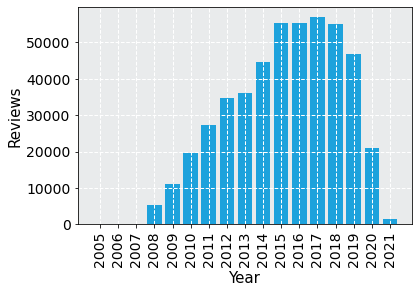

In [4]:
# check the reviews by year
year_count = {}
for i in range(len(vancouver_reviews)):
    year = vancouver_reviews[i]['date'][:4]
    if year not in year_count.keys():
        year_count[year] = 1
    else:
        year_count[year] += 1
        

# plot reviews by year in bar chart
x = list(year_count.keys())
x.sort()
y = list(year_count[x[i]] for i in range(len(x)))


plt.rcParams['axes.facecolor'] = '#E9EBEC' # figure background color to light grey
plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.bar(x,y, color = '#1DA2DC')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Reviews', fontsize = 15)

plt.tick_params(labelsize = 14)
plt.xticks(rotation=90)

plt.show()

In [5]:
# filter out 2015 - 2019 vancouver reviews data
v_reviews_filtered = []
year_selected = ['2015', '2016', '2017', '2018', '2019']

for i in range(len(vancouver_reviews)):
    year = vancouver_reviews[i]['date'][:4]
    
    if year in year_selected:
        v_reviews_filtered.append(vancouver_reviews[i])

In [6]:
# check total number of vancouver_reviews during 2015 - 2019
print("The total number of vancouver reviews during 2015 - 2019 is:", len(v_reviews_filtered))

The total number of vancouver reviews during 2015 - 2019 is: 269608


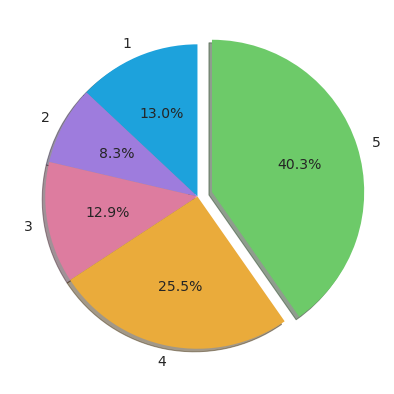

In [7]:
# reviews stars
stars = {'1':0, '2':0, '3':0, '4':0, '5':0}

for i in range(len(v_reviews_filtered)):
    star = v_reviews_filtered[i]['stars']
    
    if star < 2.0:
        stars['1'] += 1
    elif star >= 2.0 and star < 3.0:
        stars['2'] += 1
    elif star >= 3.0 and star < 4.0:
        stars['3'] += 1
    elif star >= 4.0 and star < 5.0:
        stars['4'] += 1
    elif star >= 5.0:
        stars['5'] += 1

        
# plot selected period review stars in pie chart
y = stars.values()

explode = (0, 0, 0, 0, 0.1)  # only "explode" the 5-star slice 
plt.figure(figsize = (7,7))
patches, l_text, p_text = plt.pie(y, labels = stars.keys(), explode = explode, autopct = '%.1f%%', \
        shadow = True, colors = ['#1DA2DC', '#9E7CDD', '#DD7C9F', '#EAAB3B', '#6DCA69'], startangle = 90)

# set up font size & color inside of the pie chart
for i in p_text:
    i.set_size(14)
    i.set_color('#252525')
    
# set up font size & color ouside of the pie chart
for i in l_text:
    i.set_size(14)
    i.set_color('#252525')
    
plt.show()

In [8]:
# combine business & reviews for selected period(2015-2019) - adds business information for each review record
reviews_business = copy.deepcopy(v_reviews_filtered)

for i in range(len(v_reviews_filtered)):
    b_id = v_reviews_filtered[i]['business_id']
    
    for j in range(len(vancouver_business)):
        if vancouver_business[j]['business_id'] == b_id:
            for key in vancouver_business[j]:
                if key not in ['name', 'stars', 'review_count']:
                    reviews_business[i][key] = vancouver_business[j][key]
                elif key == 'name':
                    reviews_business[i]['b_name'] = vancouver_business[j][key]
                elif key == 'stars':
                    reviews_business[i]['b_stars'] = vancouver_business[j][key]
                elif key == 'review_count':
                    reviews_business[i]['b_review_count'] = vancouver_business[j][key]                 

In [9]:
reviews_business

[{'review_id': 'ucFOnqgaV40oQ2YNyz5ddQ',
  'user_id': 'JHXQEayrDHOWGexs0dCviA',
  'business_id': 'KXCXaF5qimmtKKqnPc_LQA',
  'stars': 1.0,
  'useful': 0,
  'funny': 0,
  'cool': 0,
  'text': 'Great coffee and pastries. Baristas are excellent. All the other staff are sooooo lost and vacant.',
  'date': '2018-03-03 23:45:25',
  'b_name': 'Thierry',
  'address': '1059 Alberni Street',
  'city': 'Vancouver',
  'state': 'BC',
  'postal_code': 'V6E 1A1',
  'latitude': 49.2848765,
  'longitude': -123.1226288,
  'b_stars': 4.0,
  'b_review_count': 849,
  'is_open': 1,
  'attributes': {'RestaurantsPriceRange2': '2',
   'BikeParking': 'True',
   'WiFi': "u'free'",
   'DogsAllowed': 'False',
   'RestaurantsDelivery': 'True',
   'NoiseLevel': "u'average'",
   'BusinessParking': "{'garage': True, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
   'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': 

In [ ]:
with open('reviews_business_2015_2019.json', 'w') as json_outfile:
    json.dump(reviews_business, json_outfile)

In [10]:
# collect user id who has rated vancouver restaurants in selected period(2015 - 2019)
uid_lst = []
for i in range(len(reviews_business)):
    if reviews_business[i]['user_id'] not in uid_lst:
        uid_lst.append(reviews_business[i]['user_id'])

In [12]:
# import user.json to raw_user_data
raw_user_data = [json.loads(line) for line in open('yelp_academic_dataset_user.json', 'r')]

# extract users info who have rated vancouver restaurants in selected period(2015 - 2019)
users_data = []
for i in range(len(raw_user_data)):
    if raw_user_data[i]['user_id'] in uid_lst:
        users_data.append(raw_user_data[i])

In [13]:
# check total number of users in selected period(2015 - 2019)
print("The total number of users who rated vancouver restaurants during 2015-2018 is:", len(users_data))

The total number of users who rated vancouver restaurants during 2015-2018 is: 84071


In [14]:
# find review_count outliers in users_data
review_count_lst = []
for i in range(len(users_data)):
    review_count_lst.append(users_data[i]['review_count'])
    
q1 = np.quantile(review_count_lst, 0.25)
q3 = np.quantile(review_count_lst, 0.75)
lower_fence = q1 - 1.5 * (q3 - q1)
upper_fence = q3 + 1.5 * (q3 - q1)
print("Q1:", q1)
print("Q3:", q3)
print("lower_fence", lower_fence)
print("upper_fence", upper_fence)

Q1: 2.0
Q3: 24.0
lower_fence -31.0
upper_fence 57.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bea7e53d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bea7da9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bea7e5790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9bea7cea00>],
 'fliers': [],
 'means': []}

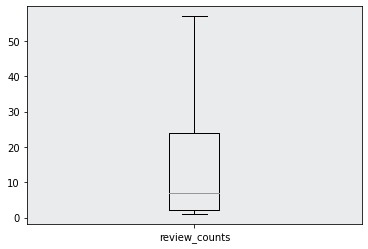

In [15]:
# draw box-plot of review_count 
plt.boxplot(review_count_lst, 0, '', labels = ['review_counts'])

In [16]:
# remove review_count outliers and extract user info whose review_counts is less than 57
user_filtered = []
for i in range(len(users_data)):
    if users_data[i]['review_count'] <= 57:
        user_filtered.append(users_data[i])

In [17]:
# conbime reviews_business & users - add users information for each review_business record
reviews_business_users = []

for i in range(len(reviews_business)):
    review = []
    u_id = reviews_business[i]['user_id']

    for j in range(len(user_filtered)):
        if user_filtered[j]['user_id'] == u_id:
            review = reviews_business[i]
            for key in user_filtered[j]:
                if key not in ['name', 'review_count', 'useful', 'funny', 'cool', 'friends']:
                    review[key] = user_filtered[j][key]
                elif key == 'review_count':
                    review['u_review_count'] = user_filtered[j][key]
                elif key == 'useful':
                    review['u_useful'] = user_filtered[j][key]
                elif key == 'funny':
                    review['u_funny'] = user_filtered[j][key]
                elif key == 'cool':
                    review['u_cool'] = user_filtered[j][key]
            
            reviews_business_users.append(review)

In [18]:
len(reviews_business_users)

168738

In [19]:
# export reviews_business_users json file
with open('reviews_business_users_final.json', 'w') as json_outfile:
    json.dump(reviews_business_users, json_outfile)

In [20]:
# create a dataframe of reviews_business_users
df = pd.DataFrame.from_dict(reviews_business_users, orient='columns')

In [21]:
# preview df
pd.set_option('display.max_columns', None)
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,b_name,address,city,state,postal_code,latitude,longitude,b_stars,b_review_count,is_open,attributes,categories,hours,u_review_count,yelping_since,u_useful,u_funny,u_cool,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,P320Yt8vFD3yjI34hq-umg,IMfkbLVt_GJfD7zJ9T4fcw,VPqWLp9kMiZEbctCebIZUA,3.0,0,0,0,"Overall is good, is worth the line up I don't ...",2018-09-25 03:22:50,Medina Cafe,780 Richards Street,Vancouver,BC,V6B 3A4,49.280443,-123.117036,4.0,2302,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Bars, Moroccan, Wine Bars, Breakfast & Brunch,...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-15:0', '...",12,2016-05-16 18:49:40,6,1,1,,0,4.67,0,0,0,0,0,0,0,0,0,0,0
1,d1GHSazhBfFsrcIjhlduHA,p4NHAQZS4EdyXwccRJFIrQ,VvmKYyGo4CDQ3rr9KMc4jg,5.0,0,0,0,I had so much fun walking up and down the aisl...,2018-03-23 13:46:42,Miniso,550 Granville Street,Vancouver,BC,V6C 1X6,49.283985,-123.115402,4.0,21,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Department Stores, Fashion, Shopping, Accessor...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",15,2017-02-11 21:09:01,2,1,1,,1,4.00,0,0,0,0,0,0,0,0,0,0,0
2,N5MsO0w9NWFderdSm1bEiQ,79cm11VzsOU9l3DW0lyYQw,VzBw4yBOaPc_Zniovd37yQ,2.0,0,1,0,This virtual ride takes you on a scenic and se...,2015-09-23 23:25:02,FlyOver Canada,"999 Canada Place, Unit 201",Vancouver,BC,V6C 3E1,49.289241,-123.108994,4.0,197,1,"{'BusinessParking': '{'garage': True, 'street'...","Cinema, Amusement Parks, Active Life, Arts & E...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",12,2013-10-04 21:24:44,17,1,3,,0,2.40,0,0,0,0,0,0,0,0,0,0,0
3,fH8hF8bOFGxITdwuvNQVkw,XK_VJRqf_91vCnZigJGfxw,IYyYpXSsD41g14_z-Zdtiw,5.0,0,0,0,"I found this Thai restaurant at yelp! \nSmall,...",2017-02-19 06:31:42,Kin Kao Thai Kitchen,903 Commercial Drive,Vancouver,BC,V5L,49.276356,-123.069692,4.0,143,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Thai, Restaurants","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",10,2015-05-25 00:56:03,16,7,7,,0,4.70,0,0,0,0,0,0,0,0,0,0,0
4,XPjCvOzRsoa-5-Dp3SNrjw,fNTuJcjClg4DXI_J_IcQpQ,KW2svfVHffW_FD8oeJo1xQ,1.0,0,0,0,Apparently it's a requirement to have a TERRIB...,2016-07-03 18:40:42,Something Healthy Wholesome Meals & Juice Bar,660 Abbott Street,Vancouver,BC,V6B 6N7,49.279138,-123.107450,3.5,34,0,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...","Sandwiches, Restaurants, Juice Bars & Smoothie...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",3,2016-07-03 18:26:57,6,0,1,,0,2.33,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# check data shape
df.shape

(168738, 41)

In [23]:
# check if there is Null value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168738 entries, 0 to 168737
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           168738 non-null  object 
 1   user_id             168738 non-null  object 
 2   business_id         168738 non-null  object 
 3   stars               168738 non-null  float64
 4   useful              168738 non-null  int64  
 5   funny               168738 non-null  int64  
 6   cool                168738 non-null  int64  
 7   text                168738 non-null  object 
 8   date                168738 non-null  object 
 9   b_name              168738 non-null  object 
 10  address             168738 non-null  object 
 11  city                168738 non-null  object 
 12  state               168738 non-null  object 
 13  postal_code         168738 non-null  object 
 14  latitude            168738 non-null  float64
 15  longitude           168738 non-nul

In [24]:
# check statistic summary
df.describe()

,stars,useful,funny,cool,latitude,longitude,b_stars,b_review_count,is_open,u_review_count,u_useful,u_funny,u_cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,168738.000000,168738.00000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000,168738.000000
mean,3.655887,0.79093,0.198450,0.165861,49.273923,-123.113398,3.720377,201.945365,0.833967,16.146517,14.831947,3.900568,3.762247,0.492355,3.619627,0.219636,0.090211,0.007058,0.010128,0.001245,0.278064,0.297212,0.279439,0.279439,0.129751,0.092172
std,1.543919,2.03078,0.901834,0.771119,0.022397,0.033922,0.667450,307.563883,0.372111,14.557854,23.713295,9.377214,10.550212,1.685591,0.969510,1.777836,0.424544,0.104385,0.131000,0.053764,1.303200,2.008698,2.860096,2.860096,0.740236,1.498773
min,1.000000,0.00000,0.000000,0.000000,49.090808,-123.289089,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.00000,0.000000,0.000000,49.263559,-123.130249,3.500000,37.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,3.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000,49.277614,-123.116581,4.000000,94.000000,1.000000,11.000000,7.000000,1.000000,1.000000,0.000000,3.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000,49.283785,-123.100831,4.000000,229.000000,1.000000,24.000000,19.000000,4.000000,4.000000,0.000000,4.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,69.00000,86.000000,39.000000,49.490000,-122.875741,5.000000,2302.000000,1.000000,57.000000,1157.000000,616.000000,1112.000000,172.000000,5.000000,257.000000,21.000000,10.000000,20.000000,10.000000,134.000000,455.000000,770.000000,770.000000,72.000000,354.000000


In [25]:
len(df[df['is_open'] == 0])

28016

In [26]:
len(df[df['is_open'] == 1])

140722

In [27]:
# count total number of reviews, business, and users
print("There are totally ", len(df.review_id.unique()), "reviews in the dataset.")
print("There are totally ", len(df.business_id.unique()), "Vancouver restaurants selected in the dataset.")
print("There are totally ", len(df.user_id.unique()), "users selected who rated Vancouver restaurants in the dataset.")

There are totally  168738 reviews in the dataset.
There are totally  9704 Vancouver restaurants selected in the dataset.
There are totally  72580 users selected who rated Vancouver restaurants in the dataset.


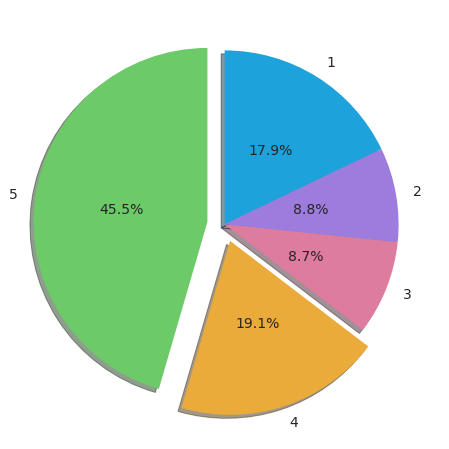

In [29]:
# recompute review stars
stars = {'1':0, '2':0, '3':0, '4':0, '5':0}

for i in range(len(df.stars)):
    star = df.stars[i]
    
    if star < 2.0:
        stars['1'] += 1
    elif star >= 2.0 and star < 3.0:
        stars['2'] += 1
    elif star >= 3.0 and star < 4.0:
        stars['3'] += 1
    elif star >= 4.0 and star < 5.0:
        stars['4'] += 1
    elif star >= 5.0:
        stars['5'] += 1
        
# plot selected period review stars in pie chart
y = stars.values()

explode = (0, 0, 0, 0.1, 0.1)  # only "explode" the 5-star slice 
plt.figure(figsize = (8,8))
patches, l_text, p_text = plt.pie(y, labels = stars.keys(), pctdistance = 0.5, \
                                  explode = explode, autopct = '%.1f%%', \
                                  counterclock = False, shadow = True, \
                                  colors = ['#1DA2DC', '#9E7CDD', '#DD7C9F', '#EAAB3B', '#6DCA69'], \
                                  startangle = 90)

# set up font size & color inside of the pie chart
for i in p_text:
    i.set_size(14)
    i.set_color('#252525')
    
# set up font size & color ouside of the pie chart
for i in l_text:
    i.set_size(14)
    i.set_color('#252525')
    
    
plt.show()

In [49]:
# collect rating stars of each business
rating_b = {b_id : [] for b_id in df.business_id.unique()}

for i in range(len(df)):
    rating_b[df.iloc[i]['business_id']].append(df.iloc[i]['stars'])
    
# collect rating stars of each user
rating_u = {u_id : [] for u_id in df.user_id.unique()}

for i in range(len(df)):
    rating_u[df.iloc[i]['user_id']].append(df.iloc[i]['stars'])

In [50]:
# calculate average rating stars of each business
avgRating_b = {b_id : [] for b_id in df.business_id.unique()}

for key in rating_b:
    avgRating_b[key] = np.mean(rating_b[key])
    
# calculate average rating stars of each user
avgRating_u = {u_id : [] for u_id in df.user_id.unique()}

for key in rating_u:
    avgRating_u[key] = np.mean(rating_u[key])

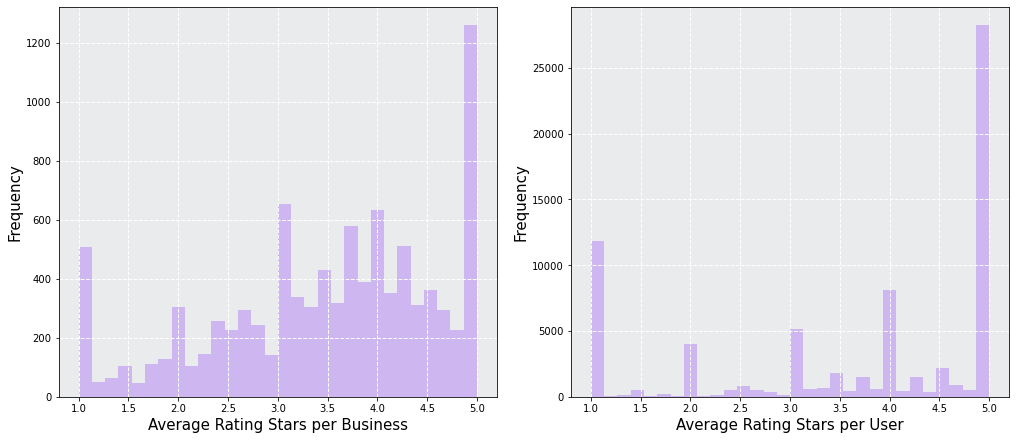

In [55]:
# two histograms of average rating stars of business and users
x = list(avgRating_b.values())
y = list(avgRating_u.values())

fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(14,6))


axs[0].hist(x, bins = 30, facecolor='#C5A6F4', alpha=0.75)
axs[0].set_xlabel('Average Rating Stars per Business', fontsize = 15)
axs[0].set_ylabel('Frequency', fontsize = 15)
axs[0].grid(color = 'white', linestyle = '--', linewidth = 1)

axs[1].hist(y, bins = 30, facecolor='#C5A6F4', alpha=0.75)
axs[1].set_xlabel('Average Rating Stars per User', fontsize = 15)
axs[1].set_ylabel('Frequency', fontsize = 15)
axs[1].grid(color = 'white', linestyle = '--', linewidth = 1)

plt.show()